In [16]:
#imports

import numpy as np
import pandas as pd

import missingno as msno

# <a name="top2"></a> Kiva Analysis & Recommender System: Data for Good
### Data Engineering


### Project Contents:
|Name|Description|
|---|---|
|01_Data_Engineering|Cleans the data to prepares non-NLP data for modeling. Initial EDA.|
|02_Preprocessing|Processes NLP data for visualizations and modeling.|
|03_Modeling|Builds a content based recommender system.|
|04_User_Model|Builds a user based recommender system for groups.|
|Data_Visualizations|Explores the data through visualizations|
|data|folder containing csv files of data used|
|streamlit|folder containing streamlit.py file, folder with streamlit images, folder with streamlit data files|
|images|folder containing saved plot images|

You are currently in notebook 01_Data_Engineering. 

### Notebook Table of Contents

* [Initial EDA](#eda2)
* [Cleaning Data for Modeling](#cleaningm)



### <a name="eda2"></a>  Initial EDA

In [17]:
# reading in the datasets.

# loans listed by ID number with their attributes. 
loans_df = pd.read_csv("../data/raw/loans.csv")

#loans listed by ID with a listed of lender usernames. 
key_loan_to_lender_df = pd.read_csv("../data/raw/loans_lenders.csv")

#lender profiles
lenders_df = pd.read_csv("../data/raw//lenders.csv")


#### Look at Missing Values Across Time - Oldest Loans on the Bottom

We found that there were certain banded time periods during which more null values were represented. You can also see that there were distinct times when new features were introduced. For example, take a look at the band for tags. It's easy to see the delineation of the pre- and post-hashtag era. 

<AxesSubplot:>

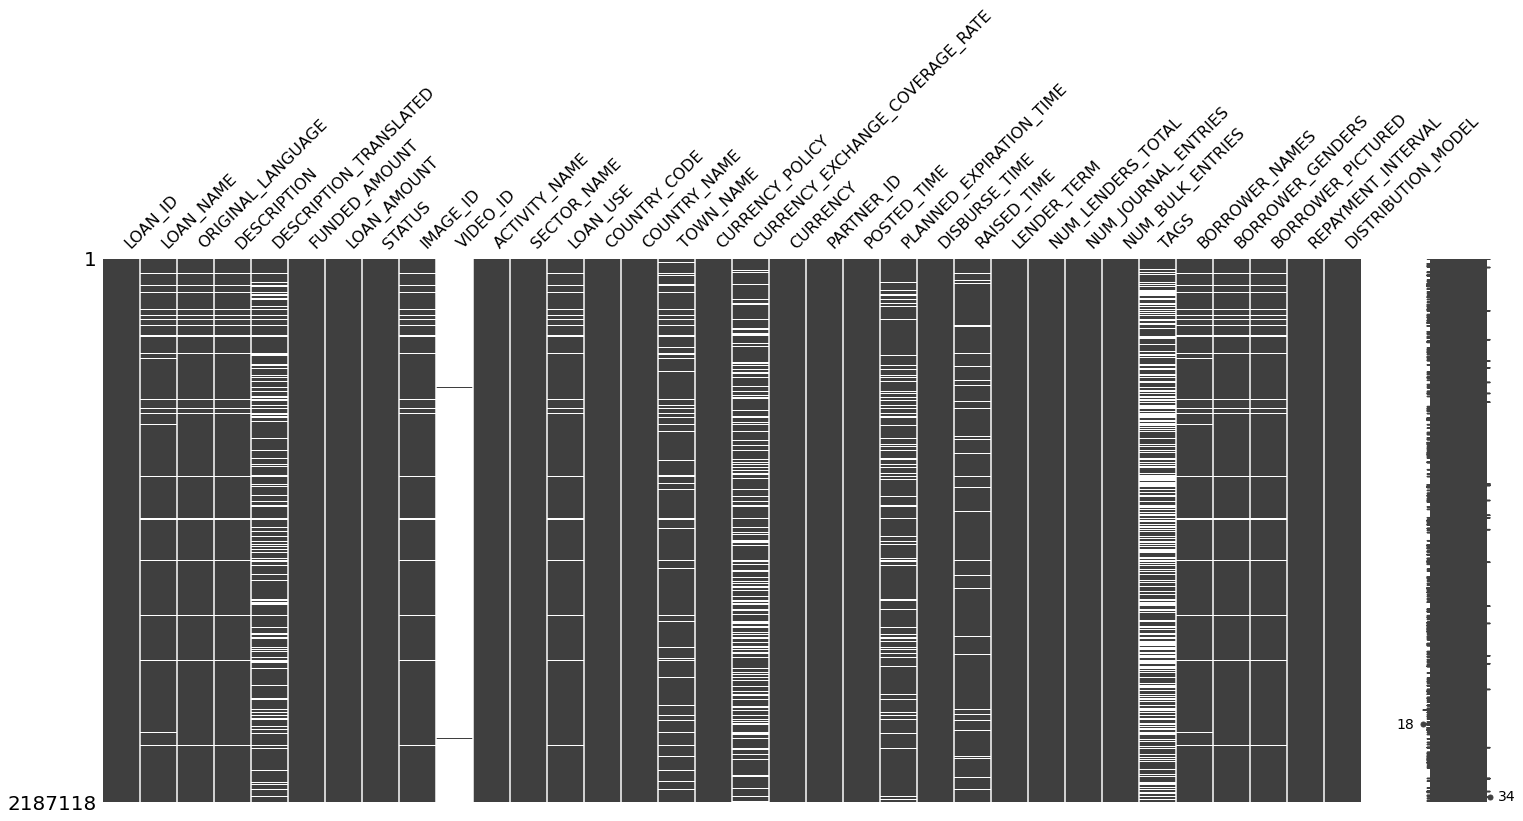

In [18]:
msno.matrix(loans_df)

In [19]:
loans_df.iloc[0:5,0:10]

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID
0,304819,Estrella De Luz Group,Spanish,"Este grupo se llama ""Estrella de luz"" está ubi...",This group is called “Estrella de Luz” (Star o...,2600.0,2600.0,funded,785529.0,NaN
1,1361590,Grace,English,"Grace is an honest, humble, and hard-working p...","Grace is an honest, humble, and hard-working p...",600.0,600.0,funded,2614927.0,NaN
2,1776536,Ligaya,English,Ligaya is a hardworking micro-entrepreneur.<br...,Ligaya is a hardworking micro-entrepreneur.<br...,200.0,200.0,funded,3173512.0,NaN
3,213423,Phorn Vann's Group,English,"Mrs. Phorn V., who is 61 years old, is the gro...",NaN,650.0,650.0,funded,565776.0,NaN
4,410154,Grace,English,Grace is 55 years old and married with 4 child...,NaN,625.0,625.0,funded,1059131.0,NaN


In [20]:
loans_df.iloc[0:5,10:20]

,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID
0,Retail,Retail,"to invest in merchandise like snacks, sweets a...",MX,Mexico,"Lerma, Edo. de México",standard,NaN,MXN,158
1,Farming,Agriculture,to buy farm inputs.,KE,Kenya,Kerugoya,shared,0.1,KES,156
2,Personal Housing Expenses,Housing,to build a sanitary toilet for her family.,PH,Philippines,"Cauayan, Negros Occidental",shared,0.1,PHP,145
3,Farming,Agriculture,To buy fertilizer,KH,Cambodia,NaN,shared,0.2,KHR,109
4,Dairy,Agriculture,To buy a dairy cow.,KE,Kenya,NaN,shared,0.2,KES,142


In [21]:
loans_df.iloc[0:5,20:]

,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,2011-06-03 19:14:41.000 +0000,NaN,2011-05-31 07:00:00.000 +0000,2011-06-14 03:36:16.000 +0000,6.0,6,1,1,NaN,"MARISOL, ANGELICA, EVA, JUANA, ISABEL, MARIA P...","female, female, female, female, female, female...","true, true, true, true, true, true, true, true...",monthly,field_partner
1,2017-08-21 12:19:10.000 +0000,2017-09-30 01:30:06.000 +0000,2017-08-18 07:00:00.000 +0000,2017-09-25 21:04:45.000 +0000,20.0,21,2,1,"#Parent, #Woman-Owned Business",Grace,female,true,monthly,field_partner
2,2019-06-10 00:59:43.000 +0000,2019-07-17 16:01:01.000 +0000,2019-06-05 07:00:00.000 +0000,2019-06-21 01:29:14.000 +0000,13.0,8,2,1,"#Eco-friendly, #Health and Sanitation",Ligaya,female,true,monthly,field_partner
3,2010-07-08 08:19:17.000 +0000,NaN,2010-06-23 07:00:00.000 +0000,2010-08-11 15:30:45.000 +0000,14.0,19,1,1,NaN,"Phorn, Bunthorn, Moeurn, Mi, Yim","female, male, female, female, female","true, true, true, true, true",bullet,field_partner
4,2012-03-28 12:13:33.000 +0000,2012-05-08 15:40:04.000 +0000,2012-03-02 08:00:00.000 +0000,2012-04-11 14:14:56.000 +0000,14.0,17,1,1,NaN,Grace,female,true,monthly,field_partner


In [22]:
loans_df.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL'],
      dtype='object')

### <a name="cleaningm"></a> Cleaning non-NLP Loans Data for Modeling

[Jump to the top of the page](#top2)


In [23]:
#fill description_translated nulls prior to combination of description columns to have one english language column. 

loans_df['DESCRIPTION_TRANSLATED'].fillna('NaN', inplace=True)

In [24]:
#function to combine all English language descriptions into one column


def f(df):
    if df['DESCRIPTION_TRANSLATED'] == 'NaN':
        return df['DESCRIPTION']
    else:
        return df['DESCRIPTION_TRANSLATED']

loans_df['DESCRIPTION'] = loans_df.apply(f, axis=1)

In [25]:
#function to prepare non-NLP data for modeling

def clean_loans_df_for_model(df = loans_df):
    
    #dropping nulls banded by time in BORROWER_GENDERS, LOAN_USE, ORIGINAL_LANGUAGE
    df = df.drop(df[df["BORROWER_GENDERS"].isnull()].index)
    df = df.drop(df[df["LOAN_USE"].isnull()].index)
    df = df.drop(df[df["DESCRIPTION"].isnull()].index)
    df['ORIGINAL_LANGUAGE'].dropna(inplace=True)
    
    #BORROWER_GENDERS - create a column indicating if a loan is for a solely female owned/operated endeavor
    df['BORROWER_GENDERS'] = df['BORROWER_GENDERS'].str.split(', ')
    df['FEMALE_OPERATED'] = [1 if 'male' not in gen_list else 0 for gen_list in df['BORROWER_GENDERS'] ]
            
    #get_dummies to prepare columns for modeling
    df = pd.get_dummies(df, columns = ['ORIGINAL_LANGUAGE', 'ACTIVITY_NAME', 'SECTOR_NAME'],
                        drop_first=False)
    
    #drop columns not needed for modeling
    df.drop(columns = ['DESCRIPTION_TRANSLATED', 'LOAN_NAME', 'FUNDED_AMOUNT', 'IMAGE_ID', 'STATUS', 'IMAGE_ID',
           'VIDEO_ID', 'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
           'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID', 'POSTED_TIME',
           'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME', 'RAISED_TIME', 'LENDER_TERM',
           'NUM_BULK_ENTRIES', 'BORROWER_NAMES', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
           'DISTRIBUTION_MODEL', 'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'BORROWER_GENDERS'], inplace=True)
    
    return df
            
    
clean_loans_df = clean_loans_df_for_model(df = loans_df)    

In [26]:
clean_loans_df.head()

,LOAN_ID,DESCRIPTION,LOAN_AMOUNT,LOAN_USE,TAGS,FEMALE_OPERATED,ORIGINAL_LANGUAGE_Arabic,ORIGINAL_LANGUAGE_English,ORIGINAL_LANGUAGE_French,ORIGINAL_LANGUAGE_Indonesian,...,SECTOR_NAME_Entertainment,SECTOR_NAME_Food,SECTOR_NAME_Health,SECTOR_NAME_Housing,SECTOR_NAME_Manufacturing,SECTOR_NAME_Personal Use,SECTOR_NAME_Retail,SECTOR_NAME_Services,SECTOR_NAME_Transportation,SECTOR_NAME_Wholesale
0,304819,This group is called “Estrella de Luz” (Star o...,2600.0,"to invest in merchandise like snacks, sweets a...",NaN,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1361590,"Grace is an honest, humble, and hard-working p...",600.0,to buy farm inputs.,"#Parent, #Woman-Owned Business",1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1776536,Ligaya is a hardworking micro-entrepreneur.<br...,200.0,to build a sanitary toilet for her family.,"#Eco-friendly, #Health and Sanitation",1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,213423,"Mrs. Phorn V., who is 61 years old, is the gro...",650.0,To buy fertilizer,NaN,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,410154,Grace is 55 years old and married with 4 child...,625.0,To buy a dairy cow.,NaN,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#export csv of cleaned loans dataframe
clean_loans_df.to_csv("../data/transformed/loans_cleaned.csv", index=False)
